# 02 Adding Deviation to Borehole Object

In this second tutorial, you will learn how to add deviation information to desurvey the `Borehole` and to plot the deviation data using Matplotlib and PyVista. Boreholes are never completely straight and may even be drilled in a deviated way on purpose. Measuring the depth (MD), the inclination (incl) and the azimuth (azi) in intervals allows us to desurvey the borehole and getting the true `northing`, `easting`, and `tvd` (true vertical depth). 

This is done using the `wellpathpy` package and the implemented minimal curvature method. 


<div class="alert alert-block alert-success">
<b>In this tutorial, you will learn the following:</b> <br>
- How to add deviation information to the borehole object <br>
- How to add the origin to the deviation data<br>
- How to plot the deviation data<br>

</div>

## Contents
1. [Importing Libraries](#importing_libraries)
2. [Creating a new Borehole object](#creating_borehole_object)
3. [Opening the Deviation File](#opening_deviation_file)
4. [Inspecting the Deviation DataFrame](#inspecting_the_deviation_dataframe)
5. [Inspecting the desurveyed DataFrame with relative values](#inspecting_the_desurveyed_dataframe)
6. [Adding absolute origin to the desurveyed DataFrame](#adding_absolute_origin_values)
7. [Updating Location Values](#updating_location_values)
8. [Updating Coordinate References System](#updating_crs)
9. [Adding absolute origin to the desurveyed DataFrame](#adding_absolute_origin_values2)
10. [Plotting Deviation Polar Plots](#plotting_deviation_polar_plots)
11. [Displaying the Deviation in a 3D Plot](#displaying_the_deviation_in_a_3D_plot)
12. [Plotting the Borehole using PyVista](#plotting_the_borehole_using_pyvista)

<a id='importing_libraries'></a>
## Importing Libraries

First, we import the `pyborehole` package and check out the version that is installed. For convenience, we are importing the `Borehole` class from the `borehole` module using `from pyborehole.borehole import Borehole`. 

In [1]:
import numpy as np
import pyvista as pv

import pyborehole
from pyborehole.borehole import Borehole
pyborehole.__version__

C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


'v0.0.post18'

<a id='creating_borehole_object'></a>
## Creating a new Borehole object and initiating properties

A new `Borehole` object can be initiated by providing the name of the borehole. The name of the borehole can also be accessed as attribute

In [2]:
borehole = Borehole(name='RWE EB1')
borehole

Borehole: RWE EB1

In [3]:
borehole.init_properties(location=(6.313031, 50.835676), 
                         crs='EPSG:4326', 
                         altitude_above_sea_level=136)

In [4]:
borehole.df.dropna()

,Value
Name,RWE EB1
Location,POINT (6.313031 50.835676)
X,6.313031
Y,50.835676
Coordinate Reference System,EPSG:4326
Coordinate Reference System PyProj,EPSG:4326
Altitude above sea level,136
Well is vertical,True
Litholog,False
Well Tops,False


<a id='opening_deviation_file'></a>
## Opening the Deviation File

A deviation file can be opened and added to the `Borehole` class using the `add_deviation` method. The parameter `step` defines the increment between each desurveyed point. Here, we are choosing `5` meters. 

In [5]:
borehole.add_deviation(path='../../../data/borehole_deviation.csv', delimiter=';', step=5, add_origin=False)

In [6]:
borehole.deviation

<a id='inspecting_the_deviation_dataframe'></a>
## Inspecting the Deviation DataFrame

The deviation DataFrame can be inspected using the `deviation_df` attribute. It has the same contents as the deviation CSV file.

In [7]:
borehole.deviation.deviation_df

,Measured Depth,Inclination,Azimuth
0,0.0,0.0,0.0
1,50.0,0.0,0.0
2,100.0,0.0,0.0


In [8]:
borehole.deviation.md

array([  0.,  50., 100.])

In [9]:
borehole.deviation.inc

array([0., 0., 0.])

In [10]:
borehole.deviation.azi

array([0., 0., 0.])

<a id='inspecting_the_desurveyed_dataframe'></a>
## Inspecting the Desurveyed DataFrame with relative values

The desurveyed DataFrame can be inspected using the `desurveyed_df` attribute. It contains the `northing`, `easting`, and `tvd` measurements of the borehole from the origin. 

In [11]:
borehole.deviation.desurveyed_df.head()

,True Vertical Depth,Northing_rel,Easting_rel
0,0.0,0.0,0.0
1,5.0,0.0,0.0
2,10.0,0.0,0.0
3,15.0,0.0,0.0
4,20.0,0.0,0.0


In [12]:
borehole.deviation.tvd

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

In [13]:
borehole.deviation.northing_rel

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [14]:
borehole.deviation.easting_rel

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

<a id='adding_absolute_origin_values'></a>
## Adding absolute origin values to the desurveyed DataFrame

Most of the time, the absolute coordinates are needed. Therefore, you can easily add the coordinates of the origin using `add_origin_to_desurveying` which ultimately adds the coordinates to the existing columns and saves them in three new columns. However, we have defined a non-cartesian coordinate system which is not compatible to the cartesian system of the deviation data. Therefore, a `ValueError` will be raised asking you to change the coordinate system. This can be done by updating the location value.

<div class="alert alert-block alert-warning">
<b>NB: The following cell will throw a ValueError on purpose!</b> <br>
</div>

<a id='updating_location_values'></a>
## Updating location values

In order to update the location value, we are creating a GeoDataFrame out of the `Borehole` object using the built-in `to_gdf()` method, then reprojecting the geometry to `EPSG:4326` using the GeoPandas `to_crs()` method, and finally extracting the new coordinates. 

In [15]:
borehole.df.dropna()

,Value
Name,RWE EB1
Location,POINT (6.313031 50.835676)
X,6.313031
Y,50.835676
Coordinate Reference System,EPSG:4326
Coordinate Reference System PyProj,EPSG:4326
Altitude above sea level,136
Well is vertical,True
Litholog,False
Well Tops,False


In [16]:
coords_cartesian = list(borehole.to_gdf().to_crs('EPSG:25832')['geometry'].loc[0].coords)[0]
coords_cartesian

(310805.2445634408, 5634992.452732348)

In [17]:
borehole.location.wkt

'POINT (6.313031 50.835676)'

In [18]:
borehole.x

6.313031

In [19]:
borehole.y

50.835676

In [20]:
borehole.update_value(attribute='location', value=coords_cartesian, crs='EPSG:25832')

In [21]:
borehole.location.wkt

'POINT (310805.2445634408 5634992.452732348)'

In [22]:
borehole.x

310805.2445634408

In [23]:
borehole.y

5634992.452732348

In [24]:
borehole.has_deviation

True

In [25]:
borehole.df.dropna()

,Value
Name,RWE EB1
Location,POINT (310805.2445634408 5634992.452732348)
X,310805.244563
Y,5634992.452732
Coordinate Reference System,EPSG:25832
Coordinate Reference System PyProj,EPSG:25832
Altitude above sea level,136
Well is vertical,True
Litholog,False
Well Tops,False


<a id='updating_crs'></a>

## Updating Coordinate Reference System

The location value can also be updated by providing a new Coordinate Reference System and by setting the parameter `transform_coordinates` to `True` in the `update_value` method.

In [26]:
borehole = Borehole(name='RWE EB1')
borehole

Borehole: RWE EB1

In [27]:
borehole.init_properties(location=(6.313031, 50.835676), 
                         crs='EPSG:4326', 
                         altitude_above_sea_level=136)

In [28]:
borehole.df.dropna()

,Value
Name,RWE EB1
Location,POINT (6.313031 50.835676)
X,6.313031
Y,50.835676
Coordinate Reference System,EPSG:4326
Coordinate Reference System PyProj,EPSG:4326
Altitude above sea level,136
Well is vertical,True
Litholog,False
Well Tops,False


In [29]:
borehole.add_deviation(path='../../../data/borehole_deviation.csv', delimiter=';', step=10, add_origin=False)

In [30]:
borehole.deviation.desurveyed_df

,True Vertical Depth,Northing_rel,Easting_rel
0,0.0,0.0,0.0
1,10.0,0.0,0.0
2,20.0,0.0,0.0
3,30.0,0.0,0.0
4,40.0,0.0,0.0
5,50.0,0.0,0.0
6,60.0,0.0,0.0
7,70.0,0.0,0.0
8,80.0,0.0,0.0
9,90.0,0.0,0.0


In [31]:
borehole.location.wkt

'POINT (6.313031 50.835676)'

In [32]:
borehole.crs

'EPSG:4326'

In [33]:
borehole.update_value(attribute='crs', value='EPSG:25832', transform_coordinates=True)

In [34]:
borehole.location.wkt

'POINT (310805.2445634408 5634992.452732348)'

In [35]:
borehole.crs

'EPSG:25832'

In [36]:
borehole.df.dropna()

,Value
Name,RWE EB1
Location,POINT (310805.2445634408 5634992.452732348)
X,310805.244563
Y,5634992.452732
Coordinate Reference System,EPSG:25832
Coordinate Reference System PyProj,EPSG:25832
Altitude above sea level,136
Well is vertical,True
Litholog,False
Well Tops,False


<a id='adding_absolute_origin_values2'></a>
## Adding absolute origin values to the desurveyed DataFrame

Now that we have showed how to change the Coordinate Reference System of the Well and the Location coordinates, it is time to finally translate the desurveyed coordinates to its true origin, the borehole location. Since the current `location` of the `Borehole` object is stored with a cartesian Coordinate Reference System, we can easily add the origin of the borehole. It can either be provided manually with the `x`, `y`, and `altitude_above_sea_level` attributes or the values are automatically accessed from the `Borehole` object if no arguments are provided.

In [37]:
borehole.deviation.add_origin_to_desurveying(x=borehole.x,
                                             y=borehole.y,
                                             z=borehole.altitude_above_sea_level)
borehole.deviation.desurveyed_df.head()

,True Vertical Depth,Northing_rel,Easting_rel,Northing,Easting,True Vertical Depth Below Sea Level
0,0.0,0.0,0.0,5.634992e+06,310805.244563,136.0
1,10.0,0.0,0.0,5.634992e+06,310805.244563,126.0
2,20.0,0.0,0.0,5.634992e+06,310805.244563,116.0
3,30.0,0.0,0.0,5.634992e+06,310805.244563,106.0
4,40.0,0.0,0.0,5.634992e+06,310805.244563,96.0


In [38]:
borehole.deviation.add_origin_to_desurveying()
borehole.deviation.desurveyed_df.head()

,True Vertical Depth,Northing_rel,Easting_rel,Northing,Easting,True Vertical Depth Below Sea Level
0,0.0,0.0,0.0,5.634992e+06,310805.244563,136.0
1,10.0,0.0,0.0,5.634992e+06,310805.244563,126.0
2,20.0,0.0,0.0,5.634992e+06,310805.244563,116.0
3,30.0,0.0,0.0,5.634992e+06,310805.244563,106.0
4,40.0,0.0,0.0,5.634992e+06,310805.244563,96.0


In [39]:
borehole.df.dropna()

,Value
Name,RWE EB1
Location,POINT (310805.2445634408 5634992.452732348)
X,310805.244563
Y,5634992.452732
Coordinate Reference System,EPSG:25832
Coordinate Reference System PyProj,EPSG:25832
Altitude above sea level,136
Well is vertical,True
Litholog,False
Well Tops,False


In [40]:
borehole.deviation.northing

array([5634992.45273235, 5634992.45273235, 5634992.45273235,
       5634992.45273235, 5634992.45273235, 5634992.45273235,
       5634992.45273235, 5634992.45273235, 5634992.45273235,
       5634992.45273235, 5634992.45273235])

In [41]:
borehole.deviation.easting

array([310805.24456344, 310805.24456344, 310805.24456344, 310805.24456344,
       310805.24456344, 310805.24456344, 310805.24456344, 310805.24456344,
       310805.24456344, 310805.24456344, 310805.24456344])

In [42]:
borehole.deviation.tvdss

array([136., 126., 116., 106.,  96.,  86.,  76.,  66.,  56.,  46.,  36.])

<a id='plotting_deviation_polar_plots'></a>
## Plotting Deviation Polar Plots 

The deviation data can be plotted within a polar plot using the `plot_deviation_polar_plot` method. As our test borehole is vertical, we would not see and deviation. Therefore, we have replaced the azimuth and radius values (`azi` and `radius` attributes) with some random values to illustrate the functionality. 

In [43]:
borehole.deviation.az = np.arange(0,55,5)

In [44]:
borehole.deviation.radius = np.arange(0,55,5)

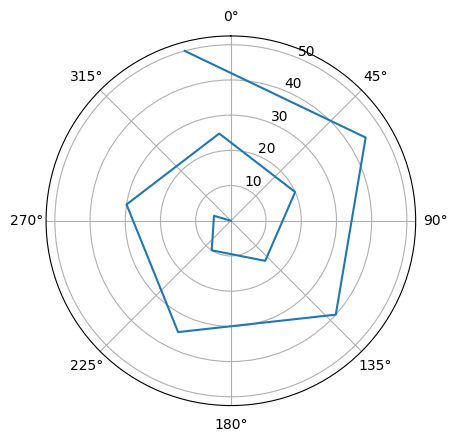

In [45]:
fig, ax = borehole.deviation.plot_deviation_polar_plot()

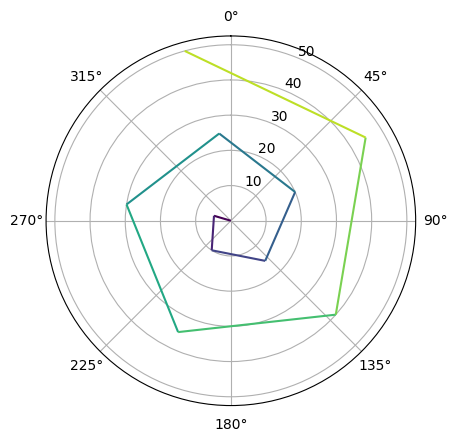

In [46]:
fig, ax = borehole.deviation.plot_deviation_polar_plot(c=borehole.deviation.tvd)

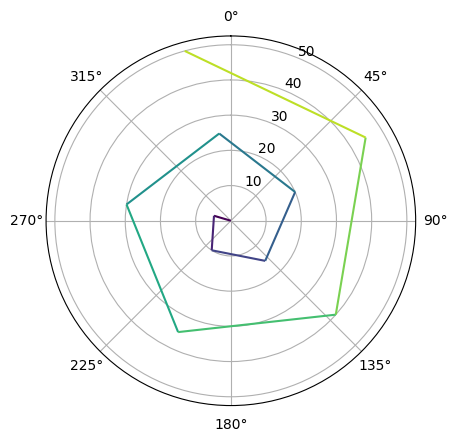

In [47]:
fig, ax = borehole.deviation.plot_deviation_polar_plot(c=borehole.deviation.az)

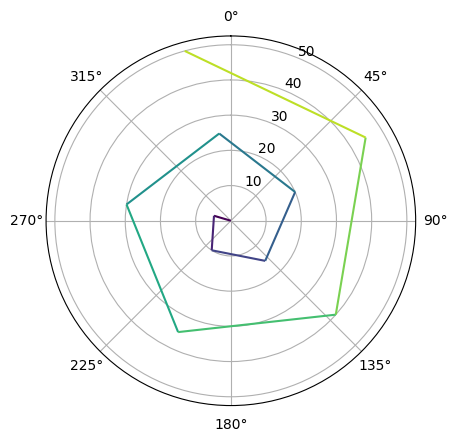

In [48]:
fig, ax = borehole.deviation.plot_deviation_polar_plot(c=borehole.deviation.radius)

<a id='displaying_the_deviation_in_a_3D_plot'></a>
## Displaying the deviation in a 3D plot

The deviation can also be visualized using a 3D plot. Here, we are using the absolute coordinates of the borehole. Using the `relative` paramter, the borhole path can also be plotted with relative coordinates.

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='Easting', ylabel='Northing', zlabel='TVD'>)

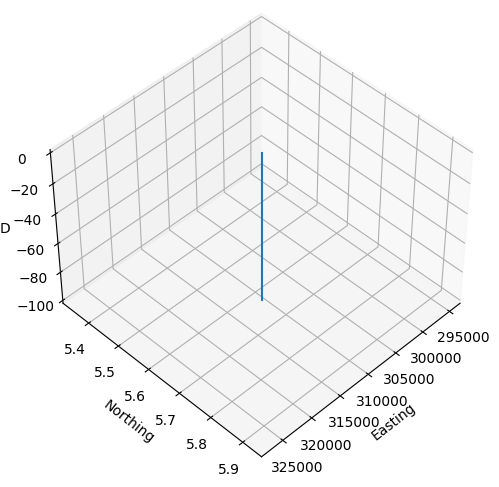

In [49]:
borehole.deviation.plot_deviation_3d()

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='Easting', ylabel='Northing', zlabel='TVD'>)

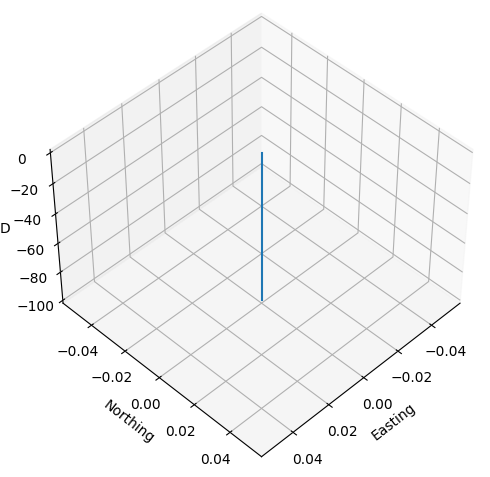

In [50]:
borehole.deviation.plot_deviation_3d(relative=True)

<a id='plotting_the_borehole_using_pyvista'></a>
## Plotting the Borehole using PyVista

The borehole path can also be plotted using the PyVista Python package. Therefore, we need to execute `get_borehole_tube` to get a PyVista object that we can then plot

In [51]:
tube = borehole.deviation.get_borehole_tube(radius = 2, relative=False)
tube

PolyData (0x1d04965d240)
  N Cells:    220
  N Points:   800
  N Strips:   220
  X Bounds:   3.108e+05, 3.108e+05
  Y Bounds:   5.635e+06, 5.635e+06
  Z Bounds:   -1.000e+02, 0.000e+00
  N Arrays:   2

C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\pyvista\jupyter\notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame.ui.vuetify'

Falling back to a static output.
  warnings.warn(


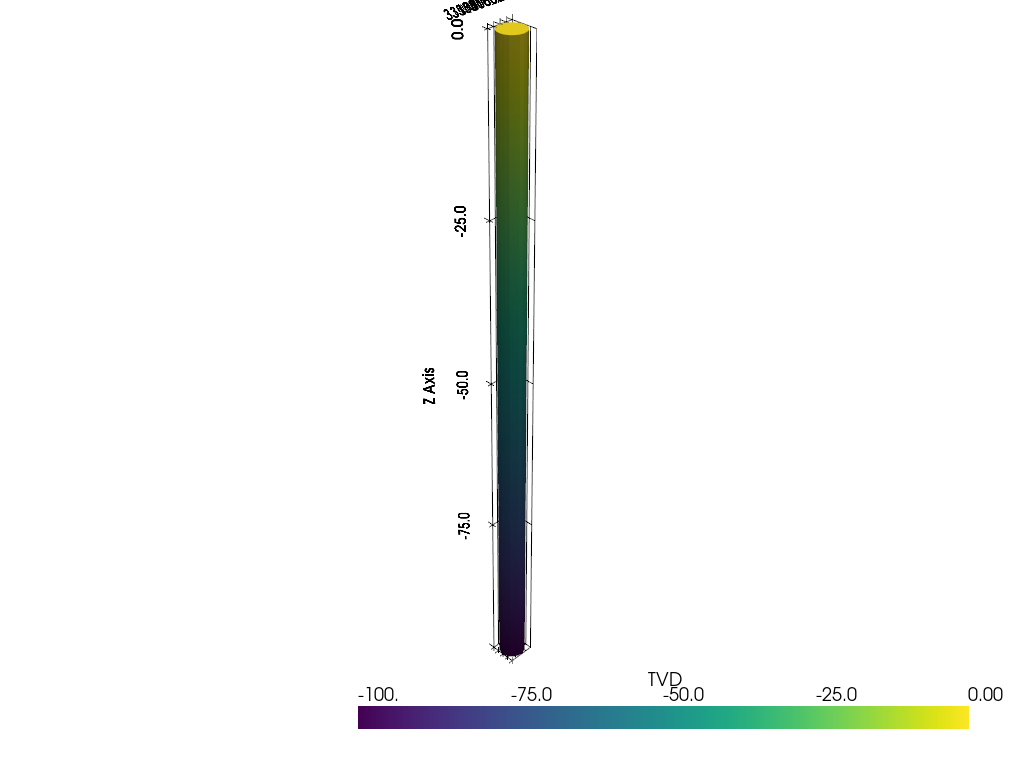

In [52]:
p = pv.Plotter(notebook=True)

p.add_mesh(tube)
p.set_scale(1,1,1)
p.show_grid(font_size=12)
p.show()

In [53]:
tube = borehole.deviation.get_borehole_tube(radius = 2, relative=True)
tube

PolyData (0x1d04af9b400)
  N Cells:    220
  N Points:   800
  N Strips:   220
  X Bounds:   -2.000e+00, 2.000e+00
  Y Bounds:   -2.000e+00, 2.000e+00
  Z Bounds:   -1.000e+02, 0.000e+00
  N Arrays:   2

C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\pyvista\jupyter\notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame.ui.vuetify'

Falling back to a static output.
  warnings.warn(


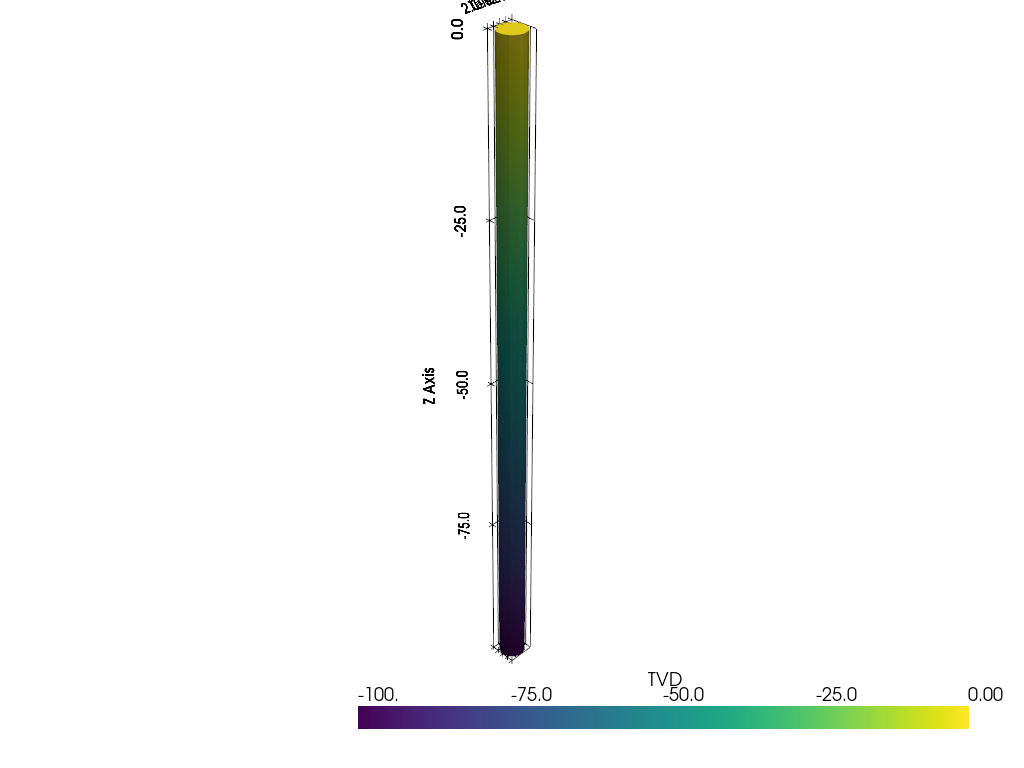

In [54]:
p = pv.Plotter(notebook=True)

p.add_mesh(tube)
p.set_scale(1,1,1)
p.show_grid(font_size=12)
p.show()